In [1]:
from graph_generating_script import *
from choosing_best_num_algorithms import *
import random
import numpy as np

random.seed(212)
np.random.seed(212)


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
wake_up_and_its_over = ['#62B8CE','#885B59','#892203','#E5510D','#605E04']
mammalian_sighting_reflex = ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D']

# Set the custom palette in Seaborn
sns.set_palette(mammalian_sighting_reflex)

# Set the custom palette in Matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=mammalian_sighting_reflex)


In [2]:
df_all_results = pd.read_csv('data/all_results_1007.csv')
df_all_results.head()

,graph_id,assortativity,layout_name,no_communities,calculated_bestnum,bestnum_algo,diff,abs_diff
0,0,0.922984,kamada_kawai,2,2,calinski_harabasz,0,0
1,0,0.922984,spring,2,2,calinski_harabasz,0,0
2,0,0.922984,davidson_harel,2,2,calinski_harabasz,0,0
3,0,0.922984,drl,2,2,calinski_harabasz,0,0
4,0,0.922984,fruchterman_reingold,2,2,calinski_harabasz,0,0


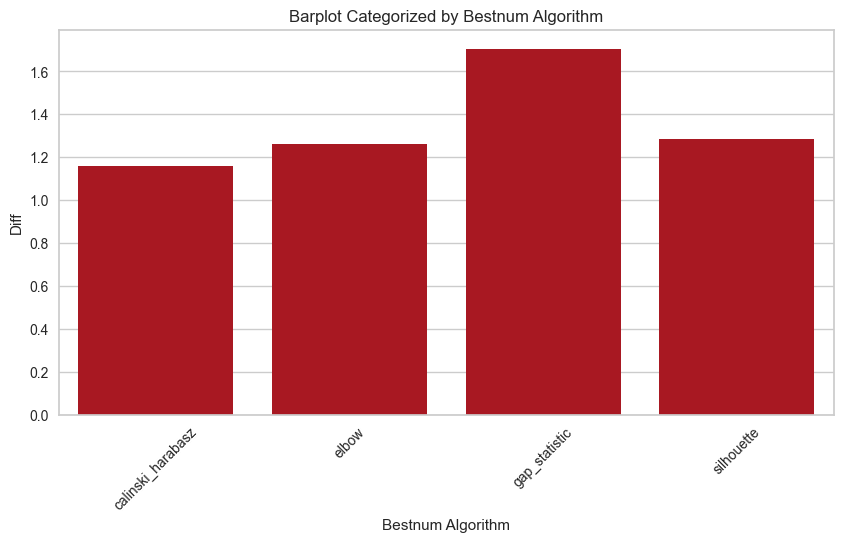

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x='bestnum_algo', y='abs_diff', data=df_all_results,estimator=np.mean, ci=False)

# Customize the plot
plt.title('Barplot Categorized by Bestnum Algorithm')
plt.xlabel('Bestnum Algorithm')
plt.ylabel('Diff')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

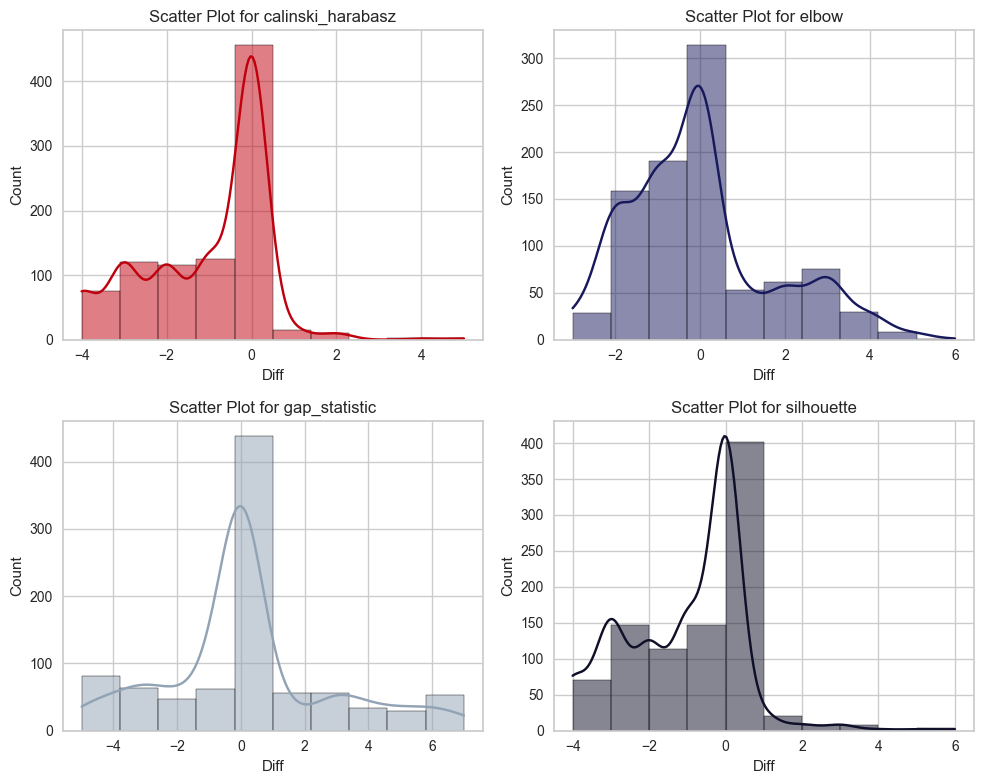

In [6]:
palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D','#C0000D']))
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
unique_algos = df_all_results['bestnum_algo'].unique()

# Iterate over each subplot and unique bestnum_algo
for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    sns.histplot(data=subset, x='diff', bins=10, kde=True, ax=ax, color=palette_dict[algo])
    # Customize the subplot
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Diff')
    # ax.set_ylabel('Abs Diff')

plt.tight_layout()
plt.show()

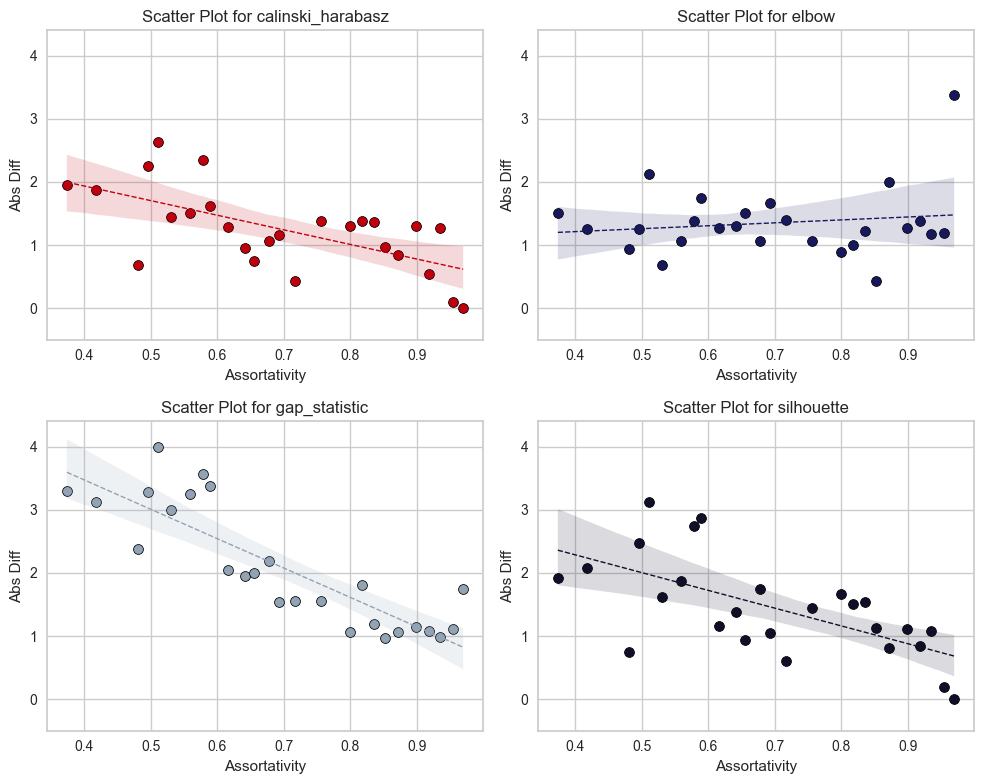

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_all_results is already loaded and contains the 'bestnum_algo', 'assortativity', and 'abs_diff' columns
palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), mammalian_sighting_reflex[:5]+['#70B0C1']))
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

unique_algos = df_all_results['bestnum_algo'].unique()
bins = np.arange(df_all_results['assortativity'].min(), df_all_results['assortativity'].max() + 0.02, 0.02)
y_min, y_max = float('inf'), float('-inf')

# Iterate over each subplot and unique bestnum_algo
for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    subset['assortativity_bin'] = pd.cut(subset['assortativity'], bins=bins, include_lowest=True)
    binned_data = subset.groupby('assortativity_bin').agg({'assortativity': 'mean', 'abs_diff': 'mean'}).reset_index()
    y_min = -0.5
    y_max = max(y_max, binned_data['abs_diff'].max())+.2
    sns.scatterplot(x='assortativity', y='abs_diff', data=binned_data, ax=ax, color=palette_dict[algo], s=50, edgecolor='black')
    sns.regplot(x='assortativity', y='abs_diff', data=binned_data, ax=ax, scatter=False, color=palette_dict[algo], line_kws={"linestyle": "--", "linewidth": 1})
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Assortativity')
    ax.set_ylabel('Abs Diff')

# Set the same y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

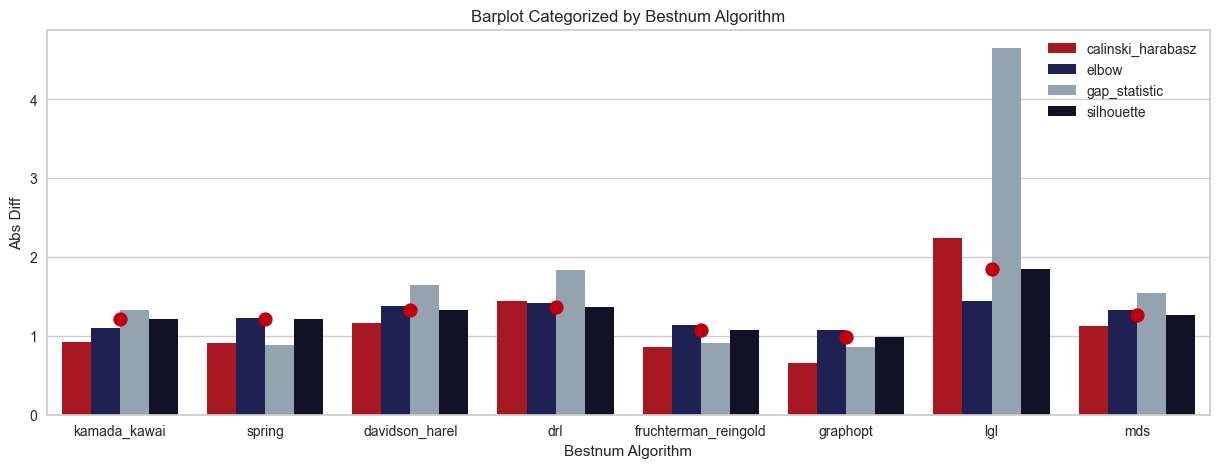

In [26]:
plt.figure(figsize=(15, 5))
# subset = df_all_results[df_all_results['assortativity'] >=.6]
sns.barplot(x='layout_name', y='abs_diff', hue='bestnum_algo', data=df_all_results, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
general_avg = subset.groupby('layout_name')['abs_diff'].mean().reset_index()
sns.pointplot(x='layout_name', y='abs_diff', data=general_avg, color=mammalian_sighting_reflex[0], markers='o', linestyles='')
# Customize the plot
plt.title('Barplot Categorized by Bestnum Algorithm')
plt.xlabel('Bestnum Algorithm')
plt.ylabel('Abs Diff')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

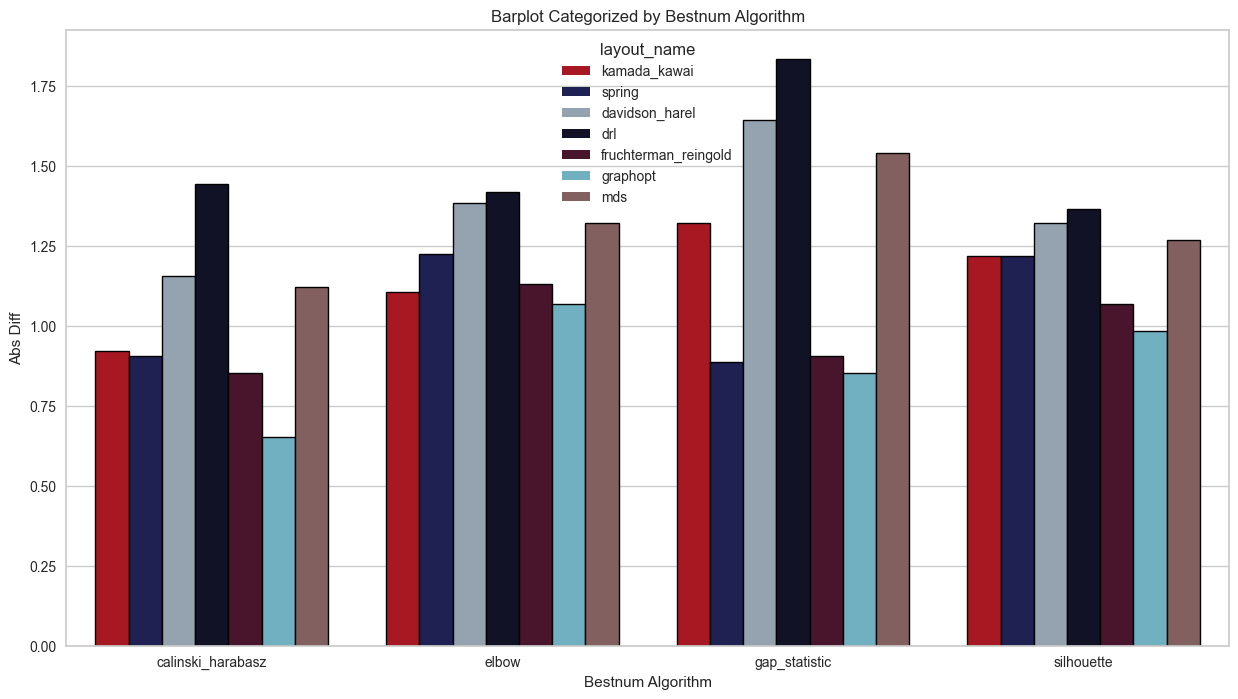

In [23]:
# plot to see which layout combo with alorithm works best
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='bestnum_algo', y='abs_diff', hue='layout_name', data=df_all_results[df_all_results['layout_name'] != 'lgl'], estimator=np.mean, palette=mammalian_sighting_reflex+wake_up_and_its_over, ci=None)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge

plt.title('Barplot Categorized by Bestnum Algorithm')
plt.xlabel('Bestnum Algorithm')
plt.ylabel('Abs Diff')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()